## Importing libraries


In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing


### Training Image Processing


In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
   print(x,x.shape)
   print(y,y.shape)
   break


tf.Tensor(
[[[[  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   ...
   [  2.     3.     5.  ]
   [  3.75   2.25   3.  ]
   [  6.     2.     1.  ]]

  [[  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   ...
   [  2.     3.     5.  ]
   [  3.     3.     3.  ]
   [  4.     3.     1.  ]]

  [[  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   ...
   [  2.     3.     5.  ]
   [  3.     3.     3.  ]
   [  4.     2.     3.  ]]

  ...

  [[  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   ...
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]]

  [[  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   ...
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]]

  [[  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   ...
   [  3.     3.     3.  ]
   [  3.     3.     3.  ]
   [  3.     3.     

## Building Model

In [9]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [10]:
model = Sequential()

##### Building covulation Layer

In [11]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\Hello\anaconda3\envs\tensorflow_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))



In [13]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [14]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Dropout(0.25))

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1500,activation='relu'))

In [19]:
## To avoid overfitting
model.add(Dropout(0.4))

In [20]:
##Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [29]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3169s 1s/step - accuracy: 0.4080 - loss: 2.0854 - val_accuracy: 0.8405 - val_loss: 0.5065
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3334s 2s/step - accuracy: 0.8426 - loss: 0.4977 - val_accuracy: 0.9149 - val_loss: 0.2703
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 16826s 8s/step - accuracy: 0.9114 - loss: 0.2823 - val_accuracy: 0.9244 - val_loss: 0.2282
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3188s 1s/step - accuracy: 0.9359 - loss: 0.1991 - val_accuracy: 0.9321 - val_loss: 0.2058
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3014s 1s/step - accuracy: 0.9528 - loss: 0.1468 - val_accuracy: 0.9427 - val_loss: 0.1836
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3507s 2s/step - accuracy: 0.9645 - loss: 0.1084 - val_accuracy: 0.9565 - val_loss: 0.1377
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3003s 1s/step - accuracy: 0.9708 - loss: 0.0873 - val_accuracy: 0.9577 - val_loss: 0.1330
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2976s 1s/step - accuracy: 0.9746 

### Model Evaluation

In [31]:
#Model Evaluation on Training Set
train_loss,train_acc= model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 687s 313ms/step - accuracy: 0.9924 - loss: 0.0223


In [32]:
print(train_loss,train_acc)

0.020052243024110794 0.9931573867797852


In [33]:
#Model on validation set
val_loss,val_acc=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 179s 326ms/step - accuracy: 0.9689 - loss: 0.1011


In [34]:
print(val_loss,val_acc)

0.10194958746433258 0.9695538282394409


### Saving Model

In [35]:
model.save("trained_model.keras")

In [36]:
training_history.history

{'accuracy': [0.6117078065872192,
  0.8645991683006287,
  0.9182302951812744,
  0.940422534942627,
  0.9555444717407227,
  0.9649619460105896,
  0.9726154208183289,
  0.9757450819015503,
  0.9796856045722961,
  0.9823884963989258],
 'loss': [1.3117361068725586,
  0.42855411767959595,
  0.25535163283348083,
  0.1827664077281952,
  0.13632625341415405,
  0.1060066893696785,
  0.08263996988534927,
  0.07430514693260193,
  0.06135856360197067,
  0.05550171807408333],
 'val_accuracy': [0.8404848575592041,
  0.9149214625358582,
  0.9244252443313599,
  0.9320510029792786,
  0.9426929354667664,
  0.95652174949646,
  0.9577168226242065,
  0.9603345990180969,
  0.9458798170089722,
  0.9695538282394409],
 'val_loss': [0.5064573287963867,
  0.2702695429325104,
  0.22823897004127502,
  0.20579521358013153,
  0.1836477369070053,
  0.13769635558128357,
  0.1329665333032608,
  0.12882933020591736,
  0.19330096244812012,
  0.1019495353102684]}

In [37]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

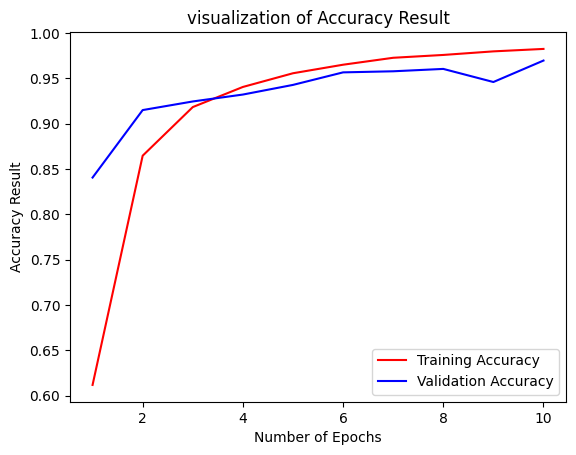

In [39]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy Result")
plt.title("visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [40]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [41]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [42]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 175s 317ms/step


(array([[9.9999774e-01, 1.8000615e-09, 9.6165653e-10, ..., 2.5768746e-14,
         2.0276576e-13, 7.3195009e-13],
        [9.9988317e-01, 8.6434426e-07, 5.8874337e-09, ..., 2.3488278e-10,
         7.2230688e-10, 1.5197349e-09],
        [9.9999356e-01, 5.4579874e-07, 3.2348531e-08, ..., 8.2213248e-14,
         2.4053168e-10, 7.0703707e-11],
        ...,
        [9.5974003e-14, 1.0088994e-18, 2.2053242e-15, ..., 3.4695892e-18,
         4.5482150e-18, 1.0000000e+00],
        [1.3231573e-13, 3.3201164e-17, 1.4448539e-14, ..., 1.5620017e-16,
         8.6410844e-16, 1.0000000e+00],
        [1.0244511e-18, 2.7247743e-20, 1.5938777e-18, ..., 2.6514023e-18,
         1.7652792e-17, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [43]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [44]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [45]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [46]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [47]:
import sklearn
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.95      0.98       504
                                 Apple___Black_rot       0.99      0.98      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.98      0.98       440
                                   Apple___healthy       0.95      0.97      0.96       502
                               Blueberry___healthy       0.96      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.98      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.97      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.99      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.97      0.92      0.

In [49]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[480,   3,   2, ...,   0,   1,   0],
       [  0, 488,   2, ...,   0,   0,   0],
       [  0,   0, 432, ...,   0,   0,   2],
       ...,
       [  0,   0,   0, ..., 485,   0,   0],
       [  0,   0,   0, ...,   0, 447,   0],
       [  0,   0,   0, ...,   0,   0, 479]])

### Visualizing Confusion Matrix

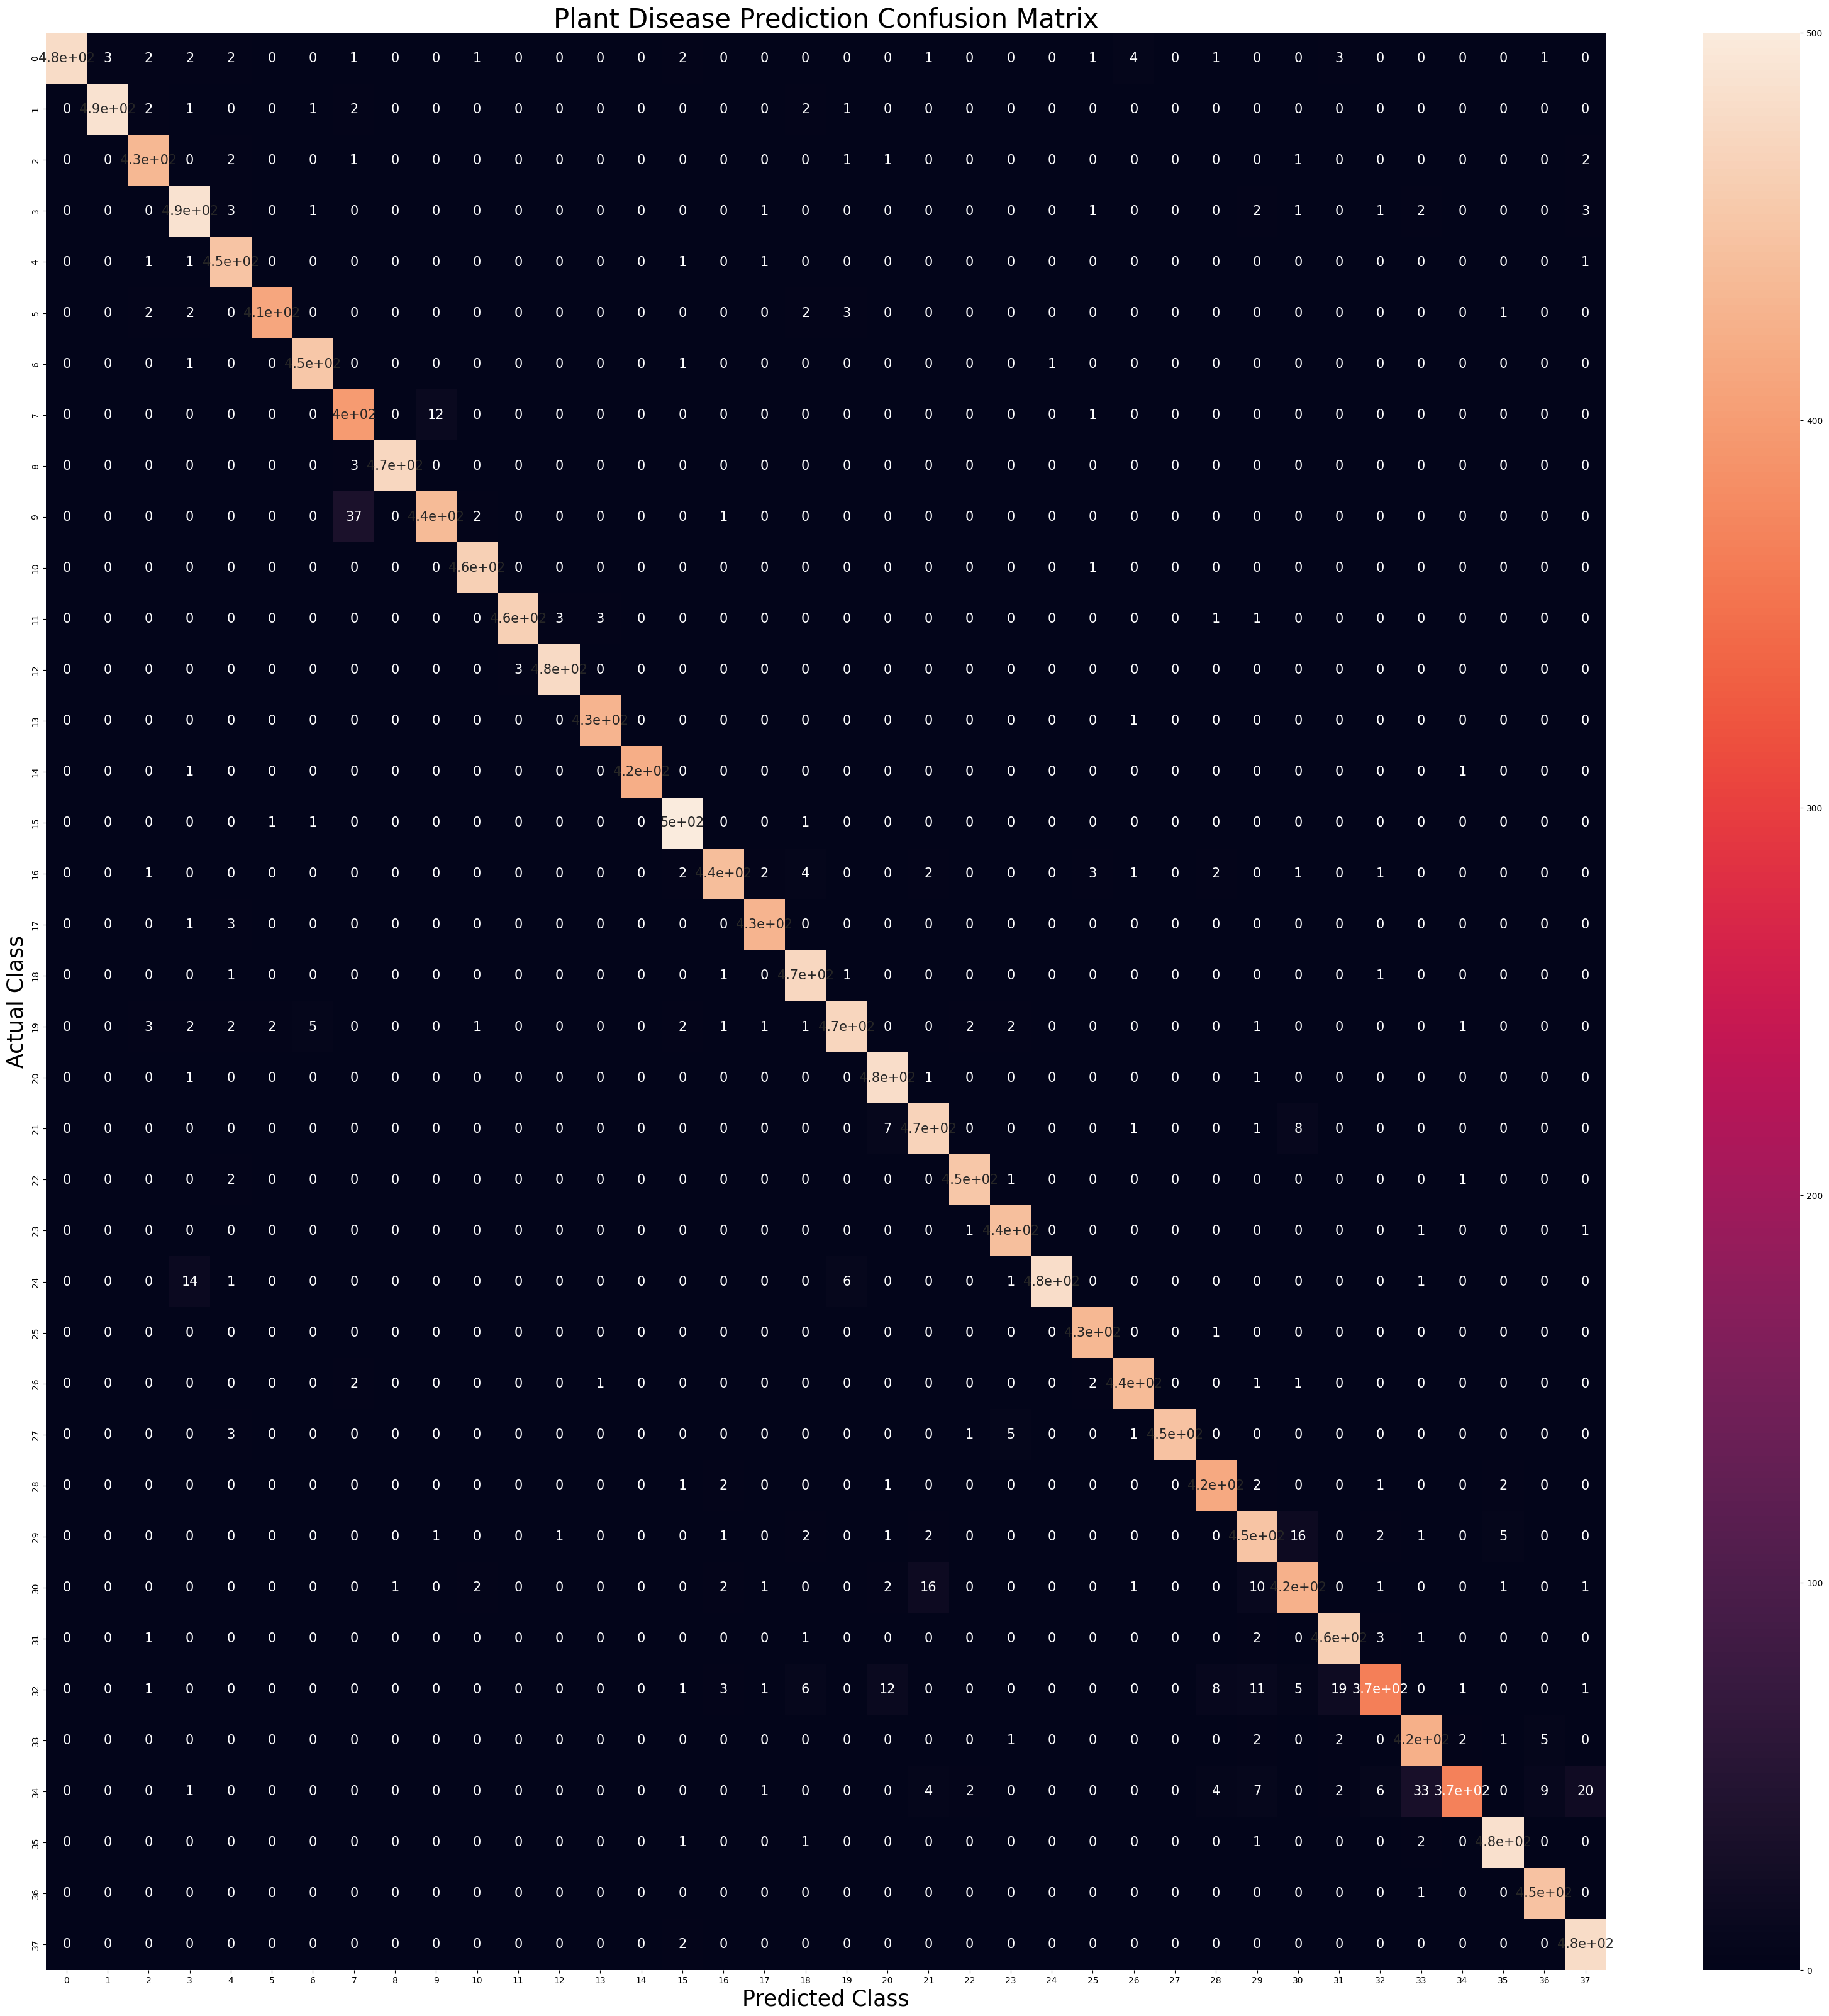

In [52]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':15})
plt.xlabel("Predicted Class",fontsize=25)
plt.ylabel("Actual Class",fontsize=25)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=30)
plt.show()